In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
combined_df = pd.read_pickle('../scripts/data/combined_df_engineered.pickle')

/home/joni/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


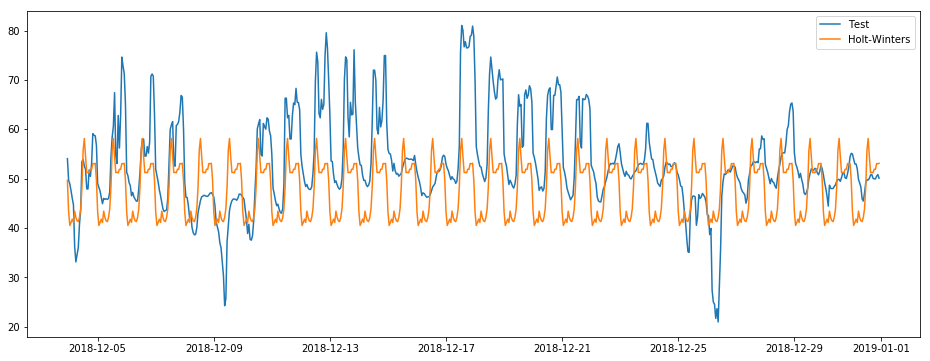

In [2]:
combined_df = combined_df['2017':'2018']
train, test = combined_df.iloc[:-(24*7*4), 0], combined_df.iloc[-(24*7*4):, 0]
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=24).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(16, 6))
#plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test,pred))
print(np.sqrt(mean_squared_error(test,pred)))

8.567680790054176
11.17615728089828
